In [1]:
import csv
import matplotlib.pyplot as plt
import os 
import numpy as np
%matplotlib inline
print(os.getcwd())

/home/therien/Documents/github/kymatio_mod/parametricSN/notebooks


In [2]:
id1 = '46cc72d103214aeca057688d72bb1157'
id2 = 'bea2dc302eca4518ba9a8b26401b911e'
info1 = {}
info2 = {}
for key in ['train_loss','test_loss','train_acc','test_acc']:
    info1[key] = [round(float(x[0]),2) for x in csv.reader(open('../../mlruns/1/{}/artifacts/metrics/{}.csv'.format(id1,key)))]
    info2[key] = [round(float(x[0]),2) for x in csv.reader(open('../../mlruns/1/{}/artifacts/metrics/{}.csv'.format(id2,key)))]


window = 5
for key in ['train_loss','train_acc']:
    temp1=[]
    temp2=[]
    for x in range(0,len(info1[key])-window):
        temp1.append(np.mean(info1[key][x:x+window]))
        temp2.append(np.mean(info2[key][x:x+window]))
    info1[key] = temp1
    info2[key] = temp2


In [3]:
print(info1['test_loss'])

[2.29, 1.84, 1.94, 1.7, 1.45, 1.37, 1.32, 1.32, 1.28, 1.31, 1.29, 1.35, 1.32, 1.34, 1.3, 1.31, 1.33, 1.24, 1.27, 1.26, 1.26]


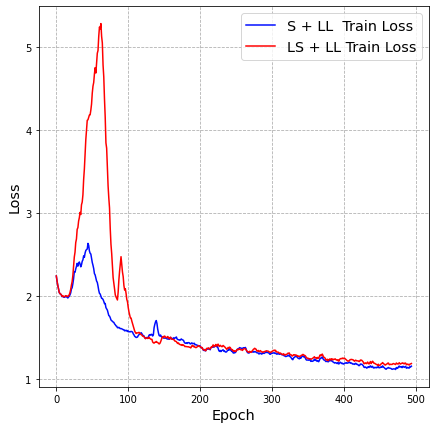

In [4]:
stderr=None
xlab="Epoch"
ylab="Loss"
color="blue"
figsize=(7,7)


f2,ax = plt.subplots(figsize=figsize)
# plt.title(title,fontsize='x-large')
plt.xlabel(xlab,fontsize='x-large')
plt.ylabel(ylab,fontsize='x-large')



plt.plot([x for x in range(len(info1['train_loss']))],info1['train_loss'],
         label='S + LL '.ljust(8)+'Train Loss',color='#000CFF',zorder=2)

plt.plot([x for x in range(len(info2['train_loss']))],info2['train_loss'],
         label='LS + LL Train Loss',color='#FF0000',zorder=2)


# plt.plot([x*25 for x in range(len(info1['test_loss']))],info1['test_loss'],
#          label='S + LL '.ljust(8)+'Test Loss',color='#6167EA',zorder=2)

# plt.plot([x*25 for x in range(len(info2['test_loss']))],info2['test_loss'],
#          label='LS + LL Test Loss',color='#FF7474',zorder=2)


plt.legend(fontsize='x-large',loc=1)
ax.grid(linestyle='--',zorder=0)
plt.savefig('./figs/loss.pdf',bbox_inches="tight")
plt.show()

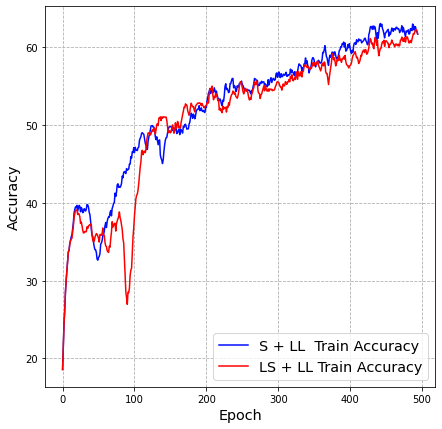

In [5]:
stderr=None
xlab="Epoch"
ylab="Accuracy"
color="blue"
figsize=(7,7)


f2,ax = plt.subplots(figsize=figsize)
# plt.title(title,fontsize='x-large')
plt.xlabel(xlab,fontsize='x-large')
plt.ylabel(ylab,fontsize='x-large')



plt.plot([x for x in range(len(info1['train_acc']))],info1['train_acc'],
         label='S + LL '.ljust(8)+'Train Accuracy',color='#000CFF',zorder=2)

plt.plot([x for x in range(len(info2['train_acc']))],info2['train_acc'],
         label='LS + LL Train Accuracy',color='#FF0000',zorder=2)


# plt.plot([x*25 for x in range(len(info1['test_acc']))],info1['test_acc'],
#          label=''S + LL '.ljust(8)+'Test Accuracy',color='#6167EA',zorder=2)

# plt.plot([x*25 for x in range(len(info2['test_acc']))],info2['test_acc'],
#          label='LS + LL Test Accuracy',color='#FF7474',zorder=2)


plt.legend(fontsize='x-large',loc=4)
ax.grid(linestyle='--',zorder=0)
plt.savefig('./figs/accuracy.pdf',bbox_inches="tight")
plt.show()

In [ ]:


def plot(xvals,yvals,stderr=None,title="default title",
         xlab="default",ylab="default",valLab="default",
         color="blue",figsize=(7,7)):

    f2,ax = plt.subplots(figsize=figsize)
    plt.title(title,fontsize='x-large')
    plt.xlabel(xlab,fontsize='xx-large')
    plt.ylabel(ylab,fontsize='xx-large')
    plt.plot([x for x in xvals],yvals,label=valLab,color=color,zorder=2)
    if str(type(stderr)) != "<class 'NoneType'>":
        plt.fill_between(range(len(yvals)), np.array(yvals)-np.array(stderr), np.array(yvals)+np.array(stderr), 
                         color="lightsteelblue", alpha=0.3,label="STD Error",zorder=1)

    plt.legend(fontsize='xx-large',loc=2)
    ax.grid(linestyle='--',zorder=0)
    plt.savefig('./{}.pdf'.format(title.replace(" ","_")),bbox_inches="tight")